## Assignment on Linear Regression

*   1.Which variables are significant in predicting the price of a car
*   How well those variables describe the price of a car *italicized text*

## Steps to follow for multiiple linear regression model
1. Read,understand and visualize the data.
2. Preparring the data for modelling.
3. Training the model
4. Residual analysis
5. Predictions and Evaluation on the test datase

### 1.   Importing libraries required

In [102]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### 2. Importing data, understanding and preparing the data

In [103]:
path=r'C:\Users\464416\Desktop\PGDS\Machine_Learning\Assignment_LinearRegresssion\CarPrice_Assignment.csv'
df_master=pd.read_csv(path)
df_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
df_master.shape

(205, 26)

In [105]:
df_master.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


3. Analyzing columns, missing data,NaN values in the dataset

In [106]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Analyzing the correlation of numeric variables**

*   Wheel base, CarLenght,Carwidth,car weight and engine size has high positive correlation with price.




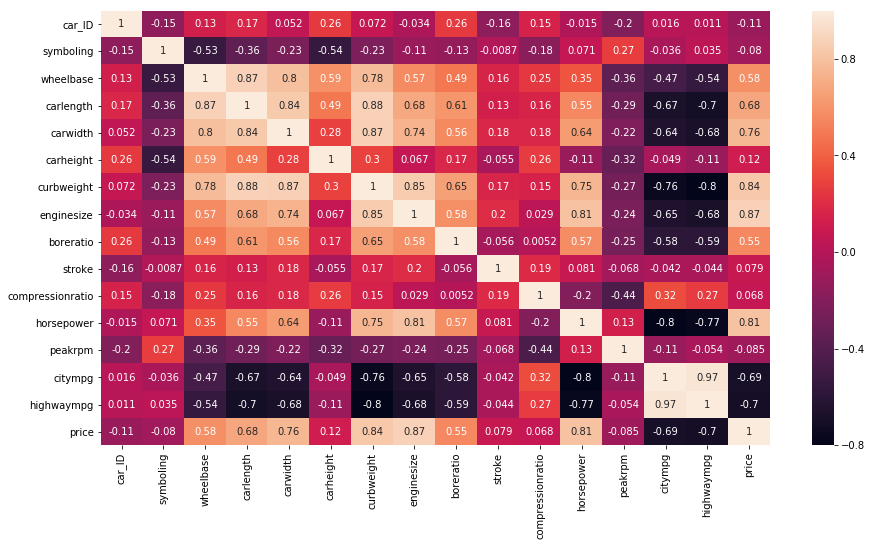

In [107]:
df_master.shape
corelation=df_master.corr()
corelation

plt.figure(figsize=(15,8))
sns.heatmap(corelation, annot=True)
plt.show()

In [108]:
# sns.pairplot(df_master)

**From the pair plot above, below are the insights:**
1. Variables such as HorsePower,enginesize,curbweight,carheight,car width,carlenght,wheelbase seems to have strong POSITIVE correlation with PRICE.
2. Variables such as highwaympg,citympg seems to have a bit NEGATIVE correlation with PRICE. *italicized text*

### **FROM THIS WE CAN CONCLUDE THAT SINCE THERE ARE GOOD NO OF VARIABLES WITH POSITIVE CORELLATION WITH PRICE WE CAN CONSIDER LINEAR REGRESSION FOR THIS SCENARIO. **

4. **Consider only company name as the independent variable for model building**

*   Creating two new coloums splitting 'CarName' column to get carmodel and car company name.




## Data Preperation

In [109]:
#Splitting the 'CarName' column
df_master['CarCompany']=[i[0] for i in df_master.CarName.apply(lambda x: re.split('\s',x,1))]
df_master['CarModel']=[i[-1] for i in df_master.CarName.apply(lambda x: re.split('\s',x,1))]
df_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [110]:
#Identifying and standerdizing data without discrepencies in names
x= df_master.CarCompany.unique()
x

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [111]:
#Treating the duplicate charcters in each car company name and standerdizing them.

df_master['CarCompany'] = np.where(df_master.CarCompany=='maxda', 'mazda', df_master.CarCompany)
df_master['CarCompany'] = np.where(df_master.CarCompany=='nissan', 'Nissan', df_master.CarCompany)
df_master['CarCompany'] = np.where(df_master.CarCompany=='porcshce', 'porsche', df_master.CarCompany)
df_master['CarCompany'] = np.where(df_master.CarCompany=='toyouta', 'toyota', df_master.CarCompany)
df_master['CarCompany'] = np.where(df_master.CarCompany=='vokswagen', 'volkswagen', df_master.CarCompany)
df_master['CarCompany'] = np.where(df_master.CarCompany=='vw', 'volkswagen', df_master.CarCompany)
df_master['doornumber'] = np.where(df_master.doornumber=='two', 'Two', df_master.doornumber)
df_master['doornumber'] = np.where(df_master.doornumber=='four', 'Four', df_master.doornumber)

#After Standerdizzing getting unique values in the column 'Carcompany'
print(df_master['CarCompany'].unique())
print('No of car Companies:',len(df_master['CarCompany'].unique()))
print('No of car Companies:',len(df_master['doornumber'].unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
No of car Companies: 22
No of car Companies: 2


In [112]:
df_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,Two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,Two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,Two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,Four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,Four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## Visualizing categorical variables using BOXPOLTS

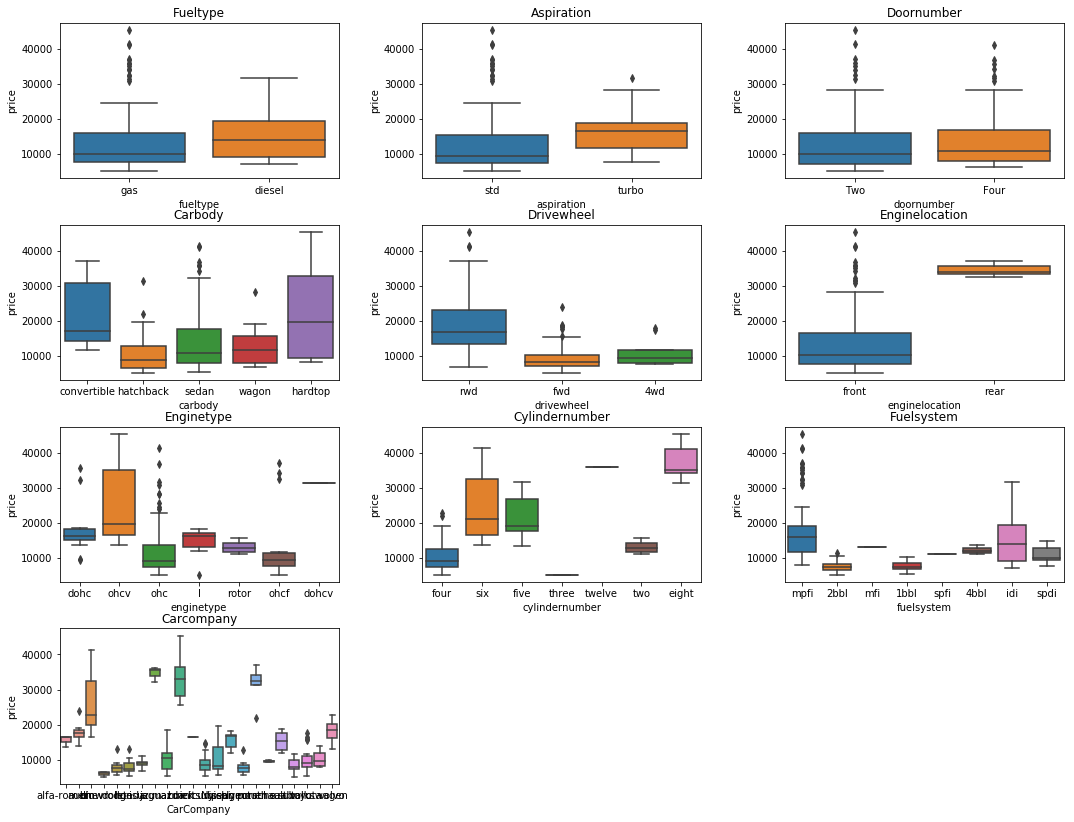

In [113]:
Boxplot_Col= df_master.select_dtypes(include='object')
Boxplot_Col= Boxplot_Col.drop(['CarName','CarModel'],axis=1)
i = 1
plt.figure(figsize=(18,14))
for item in Boxplot_Col: 
    plt.figure(1)
    plt.subplot(4,3,i)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.title(item.capitalize())
    sns.boxplot(x=item,y='price', data=df_master)
    i = i+1

## Preparing the data for Modelling
  1. Converting binary varables to 1/0
  2. Other Categorical variables to dummy variables.

In [114]:
df_master.shape

(205, 28)

In [115]:
#Variables with two categories 
print(df_master.fueltype.value_counts())
print(df_master.aspiration.value_counts())
print(df_master.doornumber.value_counts())
print(df_master.enginelocation.value_counts())

#Variables with more than two categorical values
print(df_master.CarCompany.value_counts())
print(df_master.carbody.value_counts())
print(df_master.drivewheel.value_counts())
print(df_master.enginetype.value_counts())
print(df_master.cylindernumber.value_counts())
print(df_master.fuelsystem.value_counts())


gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
Four    115
Two      90
Name: doornumber, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       

### Dummy encoding variables

In [116]:
#Above Two category variables types dummy encoding
fuel_type=pd.get_dummies(df_master['fueltype'], drop_first=True)
aspiration_type=pd.get_dummies(df_master['aspiration'], drop_first=True)
doornumber_type=pd.get_dummies(df_master['doornumber'], drop_first=True)
enginelocation_type=pd.get_dummies(df_master['enginelocation'], drop_first=True)

#Above more than 3 categories dummy variables encoding  
carbody_type=pd.get_dummies(df_master['carbody'], drop_first=True)
drivewheel_type=pd.get_dummies(df_master['drivewheel'], drop_first=True)
enginetype_type=pd.get_dummies(df_master['enginetype'], drop_first=True)
cylindernumber_type=pd.get_dummies(df_master['cylindernumber'], drop_first=True)
fuelsystem_type=pd.get_dummies(df_master['fuelsystem'], drop_first=True)
CarCompany_type=pd.get_dummies(df_master['CarCompany'], drop_first=True)
doornumber_type.head()

,Two
0,1
1,1
2,1
3,0
4,0


In [117]:
#Concatenating the above dummy variables with master daadaset
#removed 'doornumber' from below list
df_master=pd.concat([df_master,doornumber_type,CarCompany_type,fuel_type,aspiration_type,enginelocation_type,carbody_type,drivewheel_type,enginetype_type,cylindernumber_type,fuelsystem_type], axis=1)
df_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,gas,std,Two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,Two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,Two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,Four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,Four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [118]:
df_master.shape

(205, 78)

### Dropping the original un-encoded variables: fueltype,doornumber etc

In [119]:
#Dropping the original un-encoded variables: fueltype,doornumber etc
df_master= df_master.drop(['fueltype','aspiration','doornumber',
                           'enginelocation','carbody','drivewheel',
                           'enginetype','cylindernumber','fuelsystem',
                          'CarCompany','CarModel','CarName','car_ID'], axis=1)
df_master.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the dataset into train and test sets

In [120]:
#Train test splitting data
df_train,df_test=train_test_split(df_master, train_size=0.7, random_state=100)
df_train.shape
# df_test.shape
df_master.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


### Rescalling the variables:
This is for bringning all variables to same compatibility; also to avoid beta coefficient values to swing wildly; Scalling also makes sure better convergence of data and ensures speed of the modeling.


*   We rescale only the training data.

*   We'll be using Min-Max or Normalization scalling.





In [121]:
#Instantiate a scaler object
scaler=MinMaxScaler()

#Scalling only the numeric variables
num_col=['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
         'enginesize','boreratio','stroke','compressionratio','horsepower',
        'peakrpm','citympg','highwaympg','price']

#Apply Fit and transform on the numeric columns of TRAINING set 
df_train[num_col]=scaler.fit_transform(df_train[num_col])
df_train.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


In [122]:
df_train.columns
# df_train.info()

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Two',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'rear', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

### Heatmap-1 to analyze correlation between price and other variable before training the model.

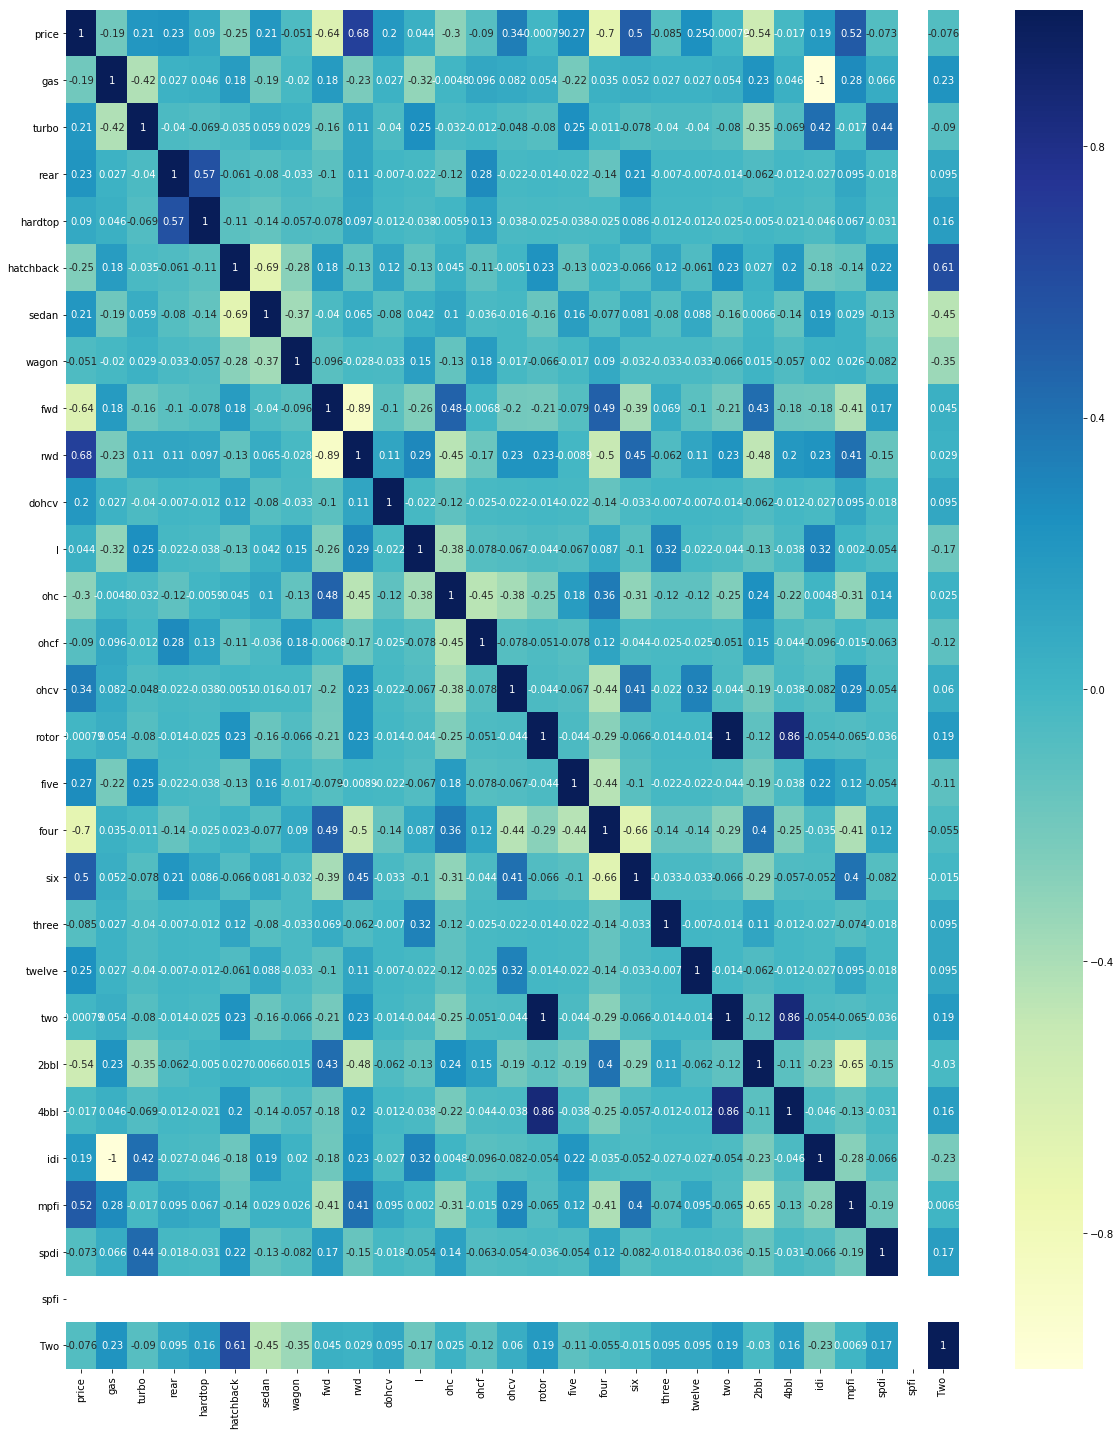

In [123]:
#Heat meap of the training dataset
#plot the correlation between price and categorical variables
df_catg=df_train.loc[:,['price', 'gas','turbo', 'rear', 'hardtop',
                        'hatchback','sedan', 'wagon', 'fwd','rwd', 'dohcv',
                        'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four','six', 
                        'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
                        'mpfi','spdi','spfi','Two']]
plt.figure(figsize=(20,25))
sns.heatmap(df_catg.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Heatmap-2 to analyze correlation between price and Numeric variable before training the model.

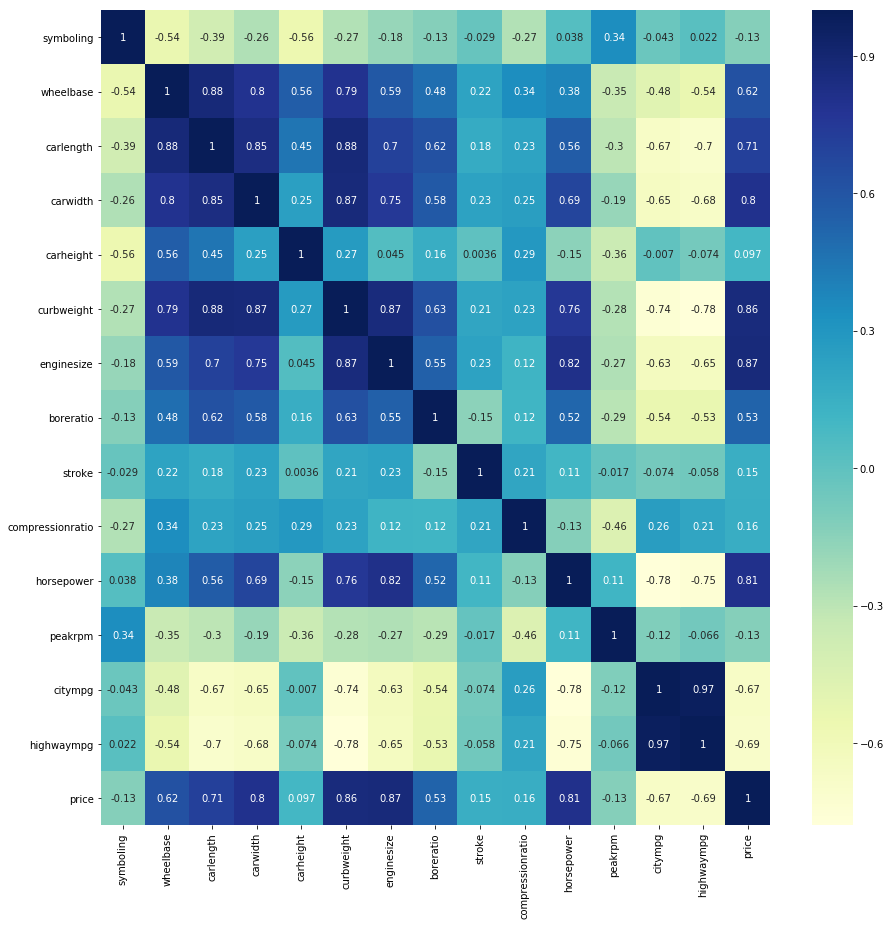

In [124]:
#Heat meap of the training dataset
df_num=df_train.loc[:,['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
         'enginesize','boreratio','stroke','compressionratio','horsepower',
        'peakrpm','citympg','highwaympg','price']]
plt.figure(figsize=(15,15))
sns.heatmap(df_num.corr(), annot=True, cmap='YlGnBu')
plt.show()

## 3. Training/Building the model:

1.   We will get the ranking of columns from RFE model.
2.   selcting the ranking of columns from RFE, We will go with a bottom-up approach to build the multiple linear     model.
*   We start with one variable which has high correlation with price from the above heat map andkeep adding other variables.
*   From above heatmaps for variables comparitively engine size seems to have the highest correlation with price.
*   So we start the model with 'Engine size' and price


### First Get the X_train and y-train variables from the training set

In [125]:
# Get the X and Y variables from the training set
y_train=df_train.pop('price')
X_train=df_train

In [126]:
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

## RFE Modelling

In [127]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [128]:
#Getting list of columns from the RFE support by ranking columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 29),
 ('highwaympg', False, 16),
 ('Two', False, 35),
 ('alfa-romero', False, 36),
 ('audi', False, 27),
 ('bmw', True, 1),
 ('buick', False, 28),
 ('chevrolet', False, 13),
 ('dodge', False, 10),
 ('honda', False, 12),
 ('isuzu', False, 33),
 ('jaguar', False, 17),
 ('mazda', False, 41),
 ('mercury', False, 43),
 ('mitsubishi', False, 3),
 ('peugeot', True, 1),
 ('plymouth', False, 9),
 ('porsche', True, 1),
 ('renault', False, 30),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 38),
 ('volkswagen', False, 39),
 ('volvo', True, 1),
 ('gas', False, 19),
 ('turbo', False, 4),
 ('rear', True, 1),
 ('hardtop', False, 21),
 ('hatchback', False, 20)

In [129]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'peugeot', 'porsche', 'saab', 'subaru', 'volvo', 'rear', 'l', 'ohcf',
       'rotor', 'five', 'four', 'three', 'twelve', 'two'],
      dtype='object')

In [130]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'plymouth', 'renault', 'toyota',
       'volkswagen', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', 'six', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Adding 1st independent variable to the model.
*   Adding enginesize which has 0.87 correlation with price

In [131]:
#We'll start analyzing the dependent cariable price variable with enginesize independent variable as it has high correlation from heat map
#Add constant 
X_train_sm=sm.add_constant(X_train['enginesize'])

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.09e-44
Time:                        22:11:55   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.000      -0.106      -0.040
enginesize     1.2107      0.058     20.748      0.000       1.095       1.326
==============================================================================
Omnibus:                       23.257   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                           0.885   Prob(JB):                     9.17e-08
Kurtosis:                       4.520   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding another independent variable to the above model to increase the r square.
*   Adding **curbweight** which has **0.86** correlation with price





In [132]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.31e-50
Time:                        22:11:55   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.000      -0.163      -0.093
enginesize     0.6782      0.105      6.489      0.000       0.472       0.885
curbweight     0.4505      0.076      5.890      0.000       0.299       0.602
==============================================================================
Omnibus:                       36.002   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.998
Skew:                           1.023   Prob(JB):                     2.12e-19
Kurtosis:                       6.202   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [134]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [135]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,13.59
1,enginesize,13.59


## Adding another independent variable to the above model to increase the r square.
*   Adding **horsepower** which has **0.81** correlation with price

In [136]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.16e-51
Time:                        22:11:55   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.000      -0.161      -0.093
enginesize     0.4743      0.115      4.114      0.000       0.246       0.702
curbweight     0.4020      0.075      5.384      0.000       0.254       0.550
horsepower     0.2982      0.083      3.589      0.000       0.134       0.463
==============================================================================
Omnibus:                       25.597   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.389
Skew:                           0.751   Prob(JB):                     9.38e-13
Kurtosis:                       5.653   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'boreratio', 'stroke', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [138]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,enginesize,18.02
0,curbweight,14.16
2,horsepower,9.05


## Adding another independent variable to the above model to increase the r square.
*   Adding **carwidth** which has **0.80** correlation with price

In [139]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.91e-51
Time:                        22:11:55   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.000      -0.200      -0.117
enginesize     0.4862      0.113      4.286      0.000       0.262       0.710
curbweight     0.2453      0.098      2.511      0.013       0.052       0.439
horsepower     0.2825      0.082      3.448      0.001       0.120       0.444
carwidth       0.2078      0.086      2.429      0.016       0.039       0.377
==============================================================================
Omnibus:                       36.489   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.927
Skew:                           1.009   Prob(JB):                     6.62e-21
Kurtosis:                       6.394   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'stroke', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [141]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,34.34
0,carwidth,19.51
2,enginesize,18.14
3,horsepower,9.08


In [142]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.39e-53
Time:                        22:11:55   Log-Likelihood:                 150.07
No. Observations:                 143   AIC:                            -288.1
Df Residuals:                     137   BIC:                            -270.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1681      0.020     -8.328      0.000      -0.208      -0.128
enginesize     0.4485      0.108      4.148      0.000       0.235       0.662
curbweight     0.2719      0.093      2.922      0.004       0.088       0.456
horsepower     0.2063      0.080      2.575      0.011       0.048       0.365
carwidth       0.2572      0.082      3.131      0.002       0.095       0.420
rear           0.3705      0.093      4.001      0.000       0.187       0.554
==============================================================================
Omnibus:                       42.702   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.317
Skew:                           1.092   Prob(JB):                     1.52e-30
Kurtosis:                       7.275   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'stroke', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [144]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,34.57
0,carwidth,19.69
2,enginesize,18.26
3,horsepower,9.58
4,rear,1.13


In [145]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.39e-53
Time:                        22:11:55   Log-Likelihood:                 150.07
No. Observations:                 143   AIC:                            -288.1
Df Residuals:                     137   BIC:                            -270.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1681      0.020     -8.328      0.000      -0.208      -0.128
enginesize     0.4485      0.108      4.148      0.000       0.235       0.662
curbweight     0.2719      0.093      2.922      0.004       0.088       0.456
horsepower     0.2063      0.080      2.575      0.011       0.048       0.365
carwidth       0.2572      0.082      3.131      0.002       0.095       0.420
rear           0.3705      0.093      4.001      0.000       0.187       0.554
==============================================================================
Omnibus:                       42.702   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.317
Skew:                           1.092   Prob(JB):                     1.52e-30
Kurtosis:                       7.275   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'stroke', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [147]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,34.57
0,carwidth,19.69
2,enginesize,18.26
3,horsepower,9.58
4,rear,1.13


In [148]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear','stroke']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.12e-52
Time:                        22:11:55   Log-Likelihood:                 150.57
No. Observations:                 143   AIC:                            -287.1
Df Residuals:                     136   BIC:                            -266.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1470      0.030     -4.971      0.000      -0.206      -0.089
enginesize     0.4669      0.110      4.253      0.000       0.250       0.684
curbweight     0.2675      0.093      2.872      0.005       0.083       0.452
horsepower     0.1954      0.081      2.416      0.017       0.035       0.355
carwidth       0.2659      0.083      3.217      0.002       0.102       0.429
rear           0.3630      0.093      3.906      0.000       0.179       0.547
stroke        -0.0470      0.048     -0.973      0.332      -0.143       0.049
==============================================================================
Omnibus:                       43.550   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.878
Skew:                           1.111   Prob(JB):                     1.55e-31
Kurtosis:                       7.345   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [150]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,34.87
0,carwidth,28.48
2,enginesize,18.39
4,horsepower,9.83
3,stroke,6.47
5,rear,1.13


In [151]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear','stroke','two']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.28e-53
Time:                        22:11:55   Log-Likelihood:                 154.88
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     135   BIC:                            -270.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1437      0.029     -4.985      0.000      -0.201      -0.087
enginesize     0.6373      0.122      5.223      0.000       0.396       0.879
curbweight     0.2177      0.092      2.358      0.020       0.035       0.400
horsepower     0.1140      0.084      1.363      0.175      -0.051       0.279
carwidth       0.2623      0.081      3.257      0.001       0.103       0.422
rear           0.3594      0.091      3.970      0.000       0.180       0.538
stroke        -0.0618      0.047     -1.304      0.194      -0.155       0.032
two            0.1424      0.049      2.898      0.004       0.045       0.240
==============================================================================
Omnibus:                       45.058   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.218
Skew:                           1.095   Prob(JB):                     1.80e-37
Kurtosis:                       7.858   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [153]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,36.13
0,carwidth,28.48
2,enginesize,23.96
4,horsepower,11.07
3,stroke,6.56
6,two,1.36
5,rear,1.13


In [154]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear','stroke','two','twelve']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.61e-53
Time:                        22:11:55   Log-Likelihood:                 157.85
No. Observations:                 143   AIC:                            -297.7
Df Residuals:                     134   BIC:                            -271.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1320      0.029     -4.587      0.000      -0.189      -0.075
enginesize     0.7975      0.138      5.798      0.000       0.525       1.070
curbweight     0.1503      0.095      1.581      0.116      -0.038       0.338
horsepower     0.1102      0.082      1.340      0.182      -0.052       0.273
carwidth       0.2576      0.079      3.253      0.001       0.101       0.414
rear           0.3172      0.091      3.496      0.001       0.138       0.497
stroke        -0.0966      0.049     -1.979      0.050      -0.193   -5.67e-05
two            0.1696      0.050      3.417      0.001       0.071       0.268
twelve        -0.2475      0.104     -2.381      0.019      -0.453      -0.042
==============================================================================
Omnibus:                       35.494   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.840
Skew:                           0.862   Prob(JB):                     5.75e-27
Kurtosis:                       7.160   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [156]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,39.59
2,enginesize,30.76
0,carwidth,28.52
4,horsepower,11.07
3,stroke,7.03
6,twelve,1.53
7,two,1.43
5,rear,1.16


In [157]:
#adding another variable curbweight
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','rear','stroke','two','twelve','rotor']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.61e-53
Time:                        22:11:55   Log-Likelihood:                 157.85
No. Observations:                 143   AIC:                            -297.7
Df Residuals:                     134   BIC:                            -271.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1320      0.029     -4.587      0.000      -0.189      -0.075
enginesize     0.7975      0.138      5.798      0.000       0.525       1.070
curbweight     0.1503      0.095      1.581      0.116      -0.038       0.338
horsepower     0.1102      0.082      1.340      0.182      -0.052       0.273
carwidth       0.2576      0.079      3.253      0.001       0.101       0.414
rear           0.3172      0.091      3.496      0.001       0.138       0.497
stroke        -0.0966      0.049     -1.979      0.050      -0.193   -5.67e-05
two            0.0848      0.025      3.417      0.001       0.036       0.134
twelve        -0.2475      0.104     -2.381      0.019      -0.453      -0.042
rotor          0.0848      0.025      3.417      0.001       0.036       0.134
==============================================================================
Omnibus:                       35.494   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.840
Skew:                           0.862   Prob(JB):                     5.75e-27
Kurtosis:                       7.160   Cond. No.                     2.64e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [159]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,rotor,inf
8,two,inf
1,curbweight,39.59
2,enginesize,30.76
0,carwidth,28.52
4,horsepower,11.07
3,stroke,7.03
7,twelve,1.53
5,rear,1.16


In [160]:
#Removing two another variable curbweight
X_train_sm=X_train[['enginesize','horsepower','carwidth','curbweight','rear','stroke','twelve','rotor']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.61e-53
Time:                        22:11:55   Log-Likelihood:                 157.85
No. Observations:                 143   AIC:                            -297.7
Df Residuals:                     134   BIC:                            -271.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1320      0.029     -4.587      0.000      -0.189      -0.075
enginesize     0.7975      0.138      5.798      0.000       0.525       1.070
horsepower     0.1102      0.082      1.340      0.182      -0.052       0.273
carwidth       0.2576      0.079      3.253      0.001       0.101       0.414
curbweight     0.1503      0.095      1.581      0.116      -0.038       0.338
rear           0.3172      0.091      3.496      0.001       0.138       0.497
stroke        -0.0966      0.049     -1.979      0.050      -0.193   -5.67e-05
twelve        -0.2475      0.104     -2.381      0.019      -0.453      -0.042
rotor          0.1696      0.050      3.417      0.001       0.071       0.268
==============================================================================
Omnibus:                       35.494   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.840
Skew:                           0.862   Prob(JB):                     5.75e-27
Kurtosis:                       7.160   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [162]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,39.59
2,enginesize,30.76
0,carwidth,28.52
4,horsepower,11.07
3,stroke,7.03
7,twelve,1.53
6,rotor,1.43
5,rear,1.16


In [163]:
#Removing two another variable curbweight
X_train_sm=X_train[['enginesize','horsepower','carwidth','curbweight','rear','stroke','twelve','rotor','four']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     96.74
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.07e-54
Time:                        22:11:56   Log-Likelihood:                 161.45
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     133   BIC:                            -273.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0518      0.042     -1.248      0.214      -0.134       0.030
enginesize     0.6551      0.145      4.513      0.000       0.368       0.942
horsepower     0.0701      0.082      0.856      0.393      -0.092       0.232
carwidth       0.2533      0.078      3.267      0.001       0.100       0.407
curbweight     0.1773      0.094      1.893      0.060      -0.008       0.362
rear           0.3207      0.089      3.611      0.000       0.145       0.496
stroke        -0.0889      0.048     -1.857      0.066      -0.184       0.006
twelve        -0.1737      0.106     -1.646      0.102      -0.383       0.035
rotor          0.0941      0.056      1.666      0.098      -0.018       0.206
four          -0.0650      0.025     -2.623      0.010      -0.114      -0.016
==============================================================================
Omnibus:                       36.283   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.284
Skew:                           0.770   Prob(JB):                     1.29e-36
Kurtosis:                       8.037   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [165]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,40.01
2,enginesize,36.83
0,carwidth,30.30
3,stroke,12.31
4,horsepower,11.16
7,four,4.55
6,rotor,1.73
8,twelve,1.68
5,rear,1.19


In [166]:
#Removing two another variable curbweight
X_train_sm=X_train[['enginesize','horsepower','carwidth','curbweight','rear','stroke','twelve','rotor','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.23e-60
Time:                        22:11:56   Log-Likelihood:                 179.04
No. Observations:                 143   AIC:                            -336.1
Df Residuals:                     132   BIC:                            -303.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0943      0.038     -2.513      0.013      -0.169      -0.020
enginesize     0.7895      0.131      6.038      0.000       0.531       1.048
horsepower     0.1199      0.073      1.638      0.104      -0.025       0.265
carwidth       0.1846      0.070      2.647      0.009       0.047       0.323
curbweight     0.2720      0.085      3.216      0.002       0.105       0.439
rear           0.3071      0.079      3.894      0.000       0.151       0.463
stroke        -0.2673      0.052     -5.173      0.000      -0.370      -0.165
twelve        -0.2901      0.096     -3.033      0.003      -0.479      -0.101
rotor          0.2110      0.054      3.928      0.000       0.105       0.317
four          -0.0561      0.022     -2.545      0.012      -0.100      -0.012
ohc            0.1144      0.019      6.067      0.000       0.077       0.152
==============================================================================
Omnibus:                       25.120   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.434
Skew:                           0.632   Prob(JB):                     5.07e-16
Kurtosis:                       6.197   Cond. No.                         45.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [168]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,curbweight,41.53
2,enginesize,37.59
0,carwidth,31.68
3,stroke,21.38
4,horsepower,11.23
6,ohc,6.48
8,four,4.60
7,rotor,1.92
9,twelve,1.74
5,rear,1.19


In [169]:
#eliminating curbweight as it has high VIF
X_train_sm=X_train[['enginesize','horsepower','carwidth','rear','stroke','twelve','rotor','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.82e-59
Time:                        22:11:56   Log-Likelihood:                 173.65
No. Observations:                 143   AIC:                            -327.3
Df Residuals:                     133   BIC:                            -297.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0965      0.039     -2.485      0.014      -0.173      -0.020
enginesize     1.0158      0.114      8.910      0.000       0.790       1.241
horsepower     0.1228      0.076      1.623      0.107      -0.027       0.273
carwidth       0.3195      0.058      5.545      0.000       0.206       0.434
rear           0.2760      0.081      3.408      0.001       0.116       0.436
stroke        -0.2708      0.053     -5.067      0.000      -0.377      -0.165
twelve        -0.3719      0.095     -3.899      0.000      -0.561      -0.183
rotor          0.2411      0.055      4.407      0.000       0.133       0.349
four          -0.0494      0.023     -2.173      0.032      -0.094      -0.004
ohc            0.1032      0.019      5.383      0.000       0.065       0.141
==============================================================================
Omnibus:                       23.075   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.042
Skew:                           0.664   Prob(JB):                     8.25e-12
Kurtosis:                       5.608   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [171]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,enginesize,26.52
2,stroke,21.36
0,carwidth,19.85
3,horsepower,11.23
5,ohc,6.25
7,four,4.53
6,rotor,1.86
8,twelve,1.62
4,rear,1.17


In [172]:
#eliminating horsepower as it has high VIF
X_train_sm=X_train[['enginesize','carwidth','rear','stroke','twelve','rotor','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     130.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.42e-59
Time:                        22:11:56   Log-Likelihood:                 172.24
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     134   BIC:                            -299.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0846      0.038     -2.205      0.029      -0.160      -0.009
enginesize     1.0938      0.104     10.518      0.000       0.888       1.299
carwidth       0.3347      0.057      5.851      0.000       0.222       0.448
rear           0.3021      0.080      3.784      0.000       0.144       0.460
stroke        -0.2758      0.054     -5.138      0.000      -0.382      -0.170
twelve        -0.3639      0.096     -3.797      0.000      -0.554      -0.174
rotor          0.2532      0.055      4.643      0.000       0.145       0.361
four          -0.0564      0.022     -2.516      0.013      -0.101      -0.012
ohc            0.0996      0.019      5.199      0.000       0.062       0.137
==============================================================================
Omnibus:                       26.296   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.959
Skew:                           0.745   Prob(JB):                     5.79e-14
Kurtosis:                       5.831   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
#engine size due to high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],axis=1)

In [174]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,stroke,21.36
1,enginesize,20.58
0,carwidth,18.89
4,ohc,6.20
6,four,4.50
5,rotor,1.76
7,twelve,1.62
3,rear,1.11


In [175]:
#eliminating stoke as it has high VIF
X_train_sm=X_train[['enginesize','carwidth','rear','twelve','rotor','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.34e-55
Time:                        22:11:56   Log-Likelihood:                 159.39
No. Observations:                 143   AIC:                            -302.8
Df Residuals:                     135   BIC:                            -279.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1348      0.040     -3.336      0.001      -0.215      -0.055
enginesize     0.8703      0.103      8.453      0.000       0.667       1.074
carwidth       0.3480      0.062      5.587      0.000       0.225       0.471
rear           0.3604      0.086      4.184      0.000       0.190       0.531
twelve        -0.1810      0.097     -1.866      0.064      -0.373       0.011
rotor          0.1588      0.056      2.837      0.005       0.048       0.269
four          -0.0680      0.024     -2.794      0.006      -0.116      -0.020
ohc            0.0410      0.017      2.444      0.016       0.008       0.074
==============================================================================
Omnibus:                       30.696   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.887
Skew:                           0.815   Prob(JB):                     1.00e-18
Kurtosis:                       6.355   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
#Eliminating variables with high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi','stroke'],axis=1)

In [177]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carwidth,18.87
1,enginesize,14.69
5,four,3.68
3,ohc,3.40
6,twelve,1.34
4,rotor,1.32
2,rear,1.10


In [178]:
#Eliminating variables with high VIF
X_train_sm=X_train[['enginesize','rear','twelve','rotor','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.44e-50
Time:                        22:11:56   Log-Likelihood:                 144.51
No. Observations:                 143   AIC:                            -275.0
Df Residuals:                     136   BIC:                            -254.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0707      0.043     -1.649      0.101      -0.155       0.014
enginesize     1.2519      0.085     14.698      0.000       1.083       1.420
rear           0.2410      0.092      2.613      0.010       0.059       0.423
twelve        -0.3281      0.103     -3.178      0.002      -0.532      -0.124
rotor          0.2346      0.060      3.909      0.000       0.116       0.353
four          -0.0646      0.027     -2.402      0.018      -0.118      -0.011
ohc            0.0434      0.019      2.340      0.021       0.007       0.080
==============================================================================
Omnibus:                       12.943   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.737
Skew:                           0.471   Prob(JB):                     5.18e-05
Kurtosis:                       4.557   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#Eliminating variables with high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi','stroke','carwidth'],axis=1)

In [180]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,ohc,3.31
4,four,3.06
0,enginesize,1.92
5,twelve,1.16
1,rear,1.04
3,rotor,1.00


In [181]:
#Eliminating variables with high VIF
X_train_sm=X_train[['enginesize','rear','twelve','four','ohc']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.99e-48
Time:                        22:11:56   Log-Likelihood:                 136.90
No. Observations:                 143   AIC:                            -261.8
Df Residuals:                     137   BIC:                            -244.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0396      0.034      1.168      0.245      -0.027       0.107
enginesize     1.0576      0.073     14.548      0.000       0.914       1.201
rear           0.2283      0.097      2.356      0.020       0.037       0.420
twelve        -0.2441      0.106     -2.300      0.023      -0.454      -0.034
four          -0.1217      0.024     -5.129      0.000      -0.169      -0.075
ohc            0.0215      0.019      1.159      0.249      -0.015       0.058
==============================================================================
Omnibus:                       13.397   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.146
Skew:                           0.474   Prob(JB):                     2.56e-05
Kurtosis:                       4.628   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
#Eliminating variables with high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi','stroke','carwidth','rotor'],axis=1)

In [183]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,ohc,3.31
3,four,3.06
0,enginesize,1.91
4,twelve,1.16
1,rear,1.04


In [184]:
#Eliminating variables with high VIF
X_train_sm=X_train[['enginesize','rear','twelve','four','rotor']]

#Add constant 
X_train_sm=sm.add_constant(X_train_sm)

#Create first model
linear=sm.OLS(y_train, X_train_sm)

#Fit the model
linear_model=linear.fit()

#Check summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.14e-50
Time:                        22:11:56   Log-Likelihood:                 141.69
No. Observations:                 143   AIC:                            -271.4
Df Residuals:                     137   BIC:                            -253.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0258      0.039     -0.664      0.508      -0.103       0.051
enginesize     1.1958      0.083     14.397      0.000       1.032       1.360
rear           0.2244      0.093      2.400      0.018       0.040       0.409
twelve        -0.3168      0.105     -3.024      0.003      -0.524      -0.110
four          -0.0650      0.027     -2.380      0.019      -0.119      -0.011
rotor          0.1923      0.058      3.306      0.001       0.077       0.307
==============================================================================
Omnibus:                       17.624   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.360
Skew:                           0.503   Prob(JB):                     7.71e-09
Kurtosis:                       5.293   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
#Eliminating variables with high VIF
X_drop=X_train.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi','stroke','carwidth'],axis=1)

In [186]:
vif=pd.DataFrame()
vif['Features']=X_drop.columns
vif['VIF']=[variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,ohc,3.31
4,four,3.06
0,enginesize,1.92
5,twelve,1.16
1,rear,1.04
3,rotor,1.00


## Residual analysis

In [187]:
## Residual analysis
y_train_pred=linear_model.predict(X_train_sm)

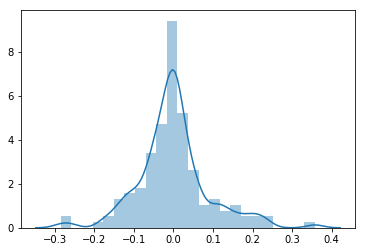

In [188]:
## Dist plot for residual of traing set
residul=y_train-y_train_pred
sns.distplot(residul)

## Prediction and evaluation on the test set

In [189]:
#Scalling only the numeric variables
num_col=['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
         'enginesize','boreratio','stroke','compressionratio','horsepower',
        'peakrpm','citympg','highwaympg','price']


#Apply transform on the numeric columns of TRAINING set 
df_test[num_col]=scaler.transform(df_test[num_col])
df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,...,0,0,0,1,0,0,0,0,0,0
186,0.8,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,...,0,0,0,0,0,0,0,1,0,0
59,0.6,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,...,0,0,0,1,0,0,0,0,0,0
165,0.6,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
140,0.8,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,...,0,0,0,1,0,0,0,0,0,0


In [190]:
y_test=df_test.pop('price')
X_test=df_test

In [191]:
#Add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,1.0,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,...,0,0,0,1,0,0,0,0,0,0
186,1.0,0.8,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,...,0,0,0,0,0,0,0,1,0,0
59,1.0,0.6,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,...,0,0,0,1,0,0,0,0,0,0
165,1.0,0.6,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
140,1.0,0.8,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,...,0,0,0,1,0,0,0,0,0,0


In [192]:
X_test_sm=X_test_sm.drop(['symboling', 'wheelbase', 'carlength','carheight',
       'boreratio', 'compressionratio','curbweight','horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'Two', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon','fwd','rwd',
       'dohcv', 'l', 'ohcf', 'ohcv', 'five','two',
       'six', 'three', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi','stroke','carwidth','ohc'],axis=1)


In [193]:
X_test_sm.head()

,const,enginesize,rear,rotor,four,twelve
160,1.0,0.139623,0,0,1,0
186,1.0,0.181132,0,0,1,0
59,1.0,0.230189,0,0,1,0
165,1.0,0.139623,0,0,1,0
140,1.0,0.177358,0,0,1,0


In [194]:
#Predict the test values
y_test_pred=linear_model.predict(X_test_sm)

In [195]:
#r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8371853513552707

## Prediction on traing set for the linear model is 82.5%
## Prediction on test set for the model is 83.7%
##This detrmine the model is predicting well